In [1]:
#libraries
import tensorflow.keras
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Model
from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adam,RMSprop,SGD
from tensorflow.keras.layers import Input , Dense , Activation, Flatten , Conv2D , MaxPool2D ,Dropout, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.losses import categorical_crossentropy   #for binary classification only
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping,ReduceLROnPlateau  #for stop over fitting
from tensorflow.keras import metrics
from keras.utils import to_categorical
from sklearn.metrics import classification_report ,confusion_matrix ,ConfusionMatrixDisplay ,accuracy_score ,precision_score, recall_score, roc_auc_score, roc_curve, auc ,f1_score,precision_recall_curve
from imblearn.metrics import specificity_score, sensitivity_score
from skimage import transform
import matplotlib.pyplot as plt
import numpy as np
import shutil
import os
import math
import seaborn as sns
import pandas as pd
import sklearn
import sys
import glob

2024-09-02 14:27:24.352234: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-09-02 14:27:24.352293: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-09-02 14:27:24.353747: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [ ]:
pip install tensorflow==2.15

In [2]:
print("Python version is", sys.version)
print("Scikit-learn version is: ", sklearn.__version__)
print("Tensorflow version is: ", tf.__version__)


Python version is 3.10.14 | packaged by conda-forge | (main, Mar 20 2024, 12:45:18) [GCC 12.3.0]
Scikit-learn version is:  1.2.2
Tensorflow version is:  2.15.0


In [3]:
main_direction_path = r'/kaggle/input/ear-5fold/data1 - 282image 7class - unsharpe - aug - CLAHE - 5Fold/fold 1'
print(main_direction_path)

/kaggle/input/ear-5fold/data1 - 282image 7class - unsharpe - aug - CLAHE - 5Fold/fold 1


In [4]:
train_folder_path = main_direction_path + '/train'
test_folder_path = main_direction_path + '/test'

In [5]:
#for train
aom_path_train_path = train_folder_path + '/AOM/'
csom_path_train_path = train_folder_path +'/CSOM/'
earwax_path_train_path = train_folder_path + '/Earwax/'
normal_path_train_path = train_folder_path +'/Normal/'
Miringoskleroz_path_train_path = train_folder_path + '/Miringoskleroz/'
otitisexterna_path_train_path = train_folder_path +'/OtitisEksterna/'


#for test
aom_path_test_path  = test_folder_path + '/AOM/'
csom_path_test_path  = test_folder_path +'/CSOM/'
earwax_path_test_path  = test_folder_path + '/Earwax/'
normal_path_test_path  = test_folder_path +'/Normal/'
Miringoskleroz_path_test_path  = test_folder_path + '/Miringoskleroz/'
otitisexterna_path_test_path  = test_folder_path +'/OtitisEksterna/'


In [6]:
totatl_train_images = (len(os.listdir(aom_path_train_path)) +
                       len(os.listdir(csom_path_train_path)) +
                       len(os.listdir(earwax_path_train_path)) +
                       len(os.listdir(normal_path_train_path)) +
                       len(os.listdir(Miringoskleroz_path_train_path)) +
                       len(os.listdir(otitisexterna_path_train_path)))

print(totatl_train_images)

871


In [7]:
totatl_test_images = (len(os.listdir(aom_path_test_path)) +
                       len(os.listdir(csom_path_test_path)) +
                       len(os.listdir(earwax_path_test_path)) +
                       len(os.listdir(normal_path_test_path)) +
                       len(os.listdir(Miringoskleroz_path_test_path)) +
                       len(os.listdir(otitisexterna_path_test_path)))

print(totatl_test_images)

217


In [8]:
classes_name = list(os.listdir(train_folder_path))
classes_name

['OtitisEksterna', 'Miringoskleroz', 'CSOM', 'Earwax', 'Normal', 'AOM']

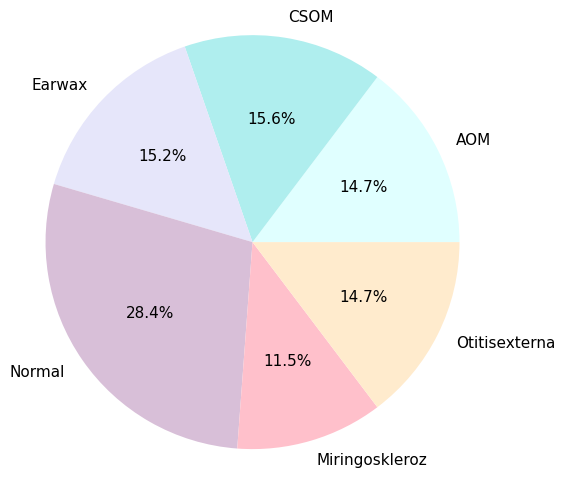

In [9]:
x = np.array([len(os.listdir(aom_path_train_path)),len(os.listdir(csom_path_train_path)),
              len(os.listdir(earwax_path_train_path)),len(os.listdir(normal_path_train_path)),
              len(os.listdir(Miringoskleroz_path_train_path)),len(os.listdir(otitisexterna_path_train_path))])
labels = ['AOM', 'CSOM', 'Earwax', 'Normal', 'Miringoskleroz', 'Otitisexterna']
plt.pie(x, labels = labels, autopct = '%.1f%%', radius= 1.4, textprops={'fontsize': 11}, colors=['#E0FFFF','#AFEEEE','#E6E6FA','#D8BFD8','#FFC0CB','#FFEBCD'])
plt.savefig("pie_chart.png")
plt.show()

In [10]:

'''
img_datagen = ImageDataGenerator(rescale = 1./255,
                                   )

test_datagen = ImageDataGenerator(rescale = 1./255,
                                   #preprocessing_function=tf.keras.applications.efficientnet.preprocess_input,
                                   )


training_set = img_datagen.flow_from_directory(train_folder_path,
                                                     target_size = (224, 224),
                                                     batch_size = 32,
                                                     class_mode='categorical',
                                                     )

test_set = test_datagen.flow_from_directory(test_folder_path,
                                          target_size = (224, 224),
                                          batch_size = 32,
                                          shuffle=False
                                      )
 '''                                     

"\nimg_datagen = ImageDataGenerator(rescale = 1./255,\n                                   )\n\ntest_datagen = ImageDataGenerator(rescale = 1./255,\n                                   #preprocessing_function=tf.keras.applications.efficientnet.preprocess_input,\n                                   )\n\n\ntraining_set = img_datagen.flow_from_directory(train_folder_path,\n                                                     target_size = (224, 224),\n                                                     batch_size = 32,\n                                                     class_mode='categorical',\n                                                     )\n\ntest_set = test_datagen.flow_from_directory(test_folder_path,\n                                          target_size = (224, 224),\n                                          batch_size = 32,\n                                          shuffle=False\n                                      )\n "

In [11]:
#training_set.class_indices

In [12]:
SIZE = 224

In [13]:
train_images = []
train_labels = [] 

In [14]:
for directory_path in glob.glob(r'/kaggle/input/ear-5fold/data1 - 282image 7class - unsharpe - aug - CLAHE - 5Fold/fold 1/train/*'):
    label = directory_path.split("/")[-1]
    print(label)
    for img_path in glob.glob(os.path.join(directory_path, "*.png")):
       # print(img_path)
        
        img = plt.imread(img_path)       
      #  img = transform.rescale(img, 1./255 ,anti_aliasing=True)
        img = transform.resize(img, (SIZE, SIZE, 3),anti_aliasing=True)

        #img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
        train_images.append(img)
        train_labels.append(label)

OtitisEksterna
Miringoskleroz
CSOM
Earwax
Normal
AOM


In [15]:
train_images = np.array(train_images)
train_labels = np.array(train_labels)

In [16]:
len(train_images)

871

In [17]:
len(train_labels)

871

In [18]:
img.shape

(224, 224, 3)

In [19]:
test_images = []
test_labels = [] 

In [20]:
for directory_path in glob.glob(r'/kaggle/input/ear-5fold/data1 - 282image 7class - unsharpe - aug - CLAHE - 5Fold/fold 1/test/*'):
    label = directory_path.split("/")[-1]
    print(label)
    for img_path in glob.glob(os.path.join(directory_path, "*.png")):
       # print(img_path)
        
        img = plt.imread(img_path)       
    #    img = transform.rescale(img, 1./255 ,anti_aliasing=True)
        img = transform.resize(img, (SIZE, SIZE, 3),anti_aliasing=True)

        #img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
        test_images.append(img)
        test_labels.append(label)

OtitisEksterna
Miringoskleroz
CSOM
Earwax
Normal
AOM


In [21]:
test_images = np.array(test_images)
test_labels = np.array(test_labels)

In [22]:
len(test_images)

217

In [23]:
len(test_labels)

217

In [24]:
#Encode labels from text to integers.
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

le.fit(train_labels)
train_labels_encoded = le.transform(train_labels)
le.fit(test_labels)
test_labels_encoded = le.transform(test_labels)

In [25]:
y_train = to_categorical(train_labels_encoded, 6)

In [26]:
y_test = to_categorical(test_labels_encoded, 6)

## Non trainable

In [27]:
input_shape = (224,224,3)
model = tf.keras.applications.MobileNet(input_shape = input_shape,
    include_top=False,
    weights="imagenet",
    input_tensor=None,
    pooling=None,
    classifier_activation="softmax",
)

model.trainable = False

global_average_pooling = GlobalAveragePooling2D()(model.output)
fc1 = Dense(units = 55, activation = 'relu', name = 'Dense1_tuned')(global_average_pooling)
dropout1 = Dropout(rate = 0.1, 
                      # seed = 123, 
                   name = 'dropout_tuned')(fc1)
fc2 = Dense(units = 50, activation = 'relu' , name = 'Dense2_tuned')(dropout1)
    
output_layer = Dense(6, activation = 'softmax', name = 'output_layer')(fc2)
model1 = Model(model.input, output_layer)

lr_schedule = keras.optimizers.schedules.ExponentialDecay(
            initial_learning_rate = 0.0007,
            decay_steps=300,
            decay_rate=0.9)

model1.compile(optimizer= Adam(learning_rate=lr_schedule), loss='categorical_crossentropy',metrics=['accuracy'])

17225924/17225924 [==============================] - 0s 0us/step


In [28]:
hist1 = model1.fit(train_images, y_train, epochs=5, validation_data = (test_images,y_test)
          , verbose=1,batch_size = 16)

Epoch 1/5


I0000 00:00:1725287313.274864     156 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


55/55 [==============================] - 8s 55ms/step - loss: 1.4940 - accuracy: 0.4259 - val_loss: 1.1041 - val_accuracy: 0.6221
Epoch 2/5
55/55 [==============================] - 1s 25ms/step - loss: 0.9067 - accuracy: 0.6831 - val_loss: 0.6867 - val_accuracy: 0.7972
Epoch 3/5
55/55 [==============================] - 1s 25ms/step - loss: 0.6055 - accuracy: 0.8152 - val_loss: 0.4766 - val_accuracy: 0.8571
Epoch 4/5
55/55 [==============================] - 1s 25ms/step - loss: 0.4027 - accuracy: 0.8772 - val_loss: 0.3444 - val_accuracy: 0.8940
Epoch 5/5
55/55 [==============================] - 1s 24ms/step - loss: 0.2690 - accuracy: 0.9334 - val_loss: 0.2577 - val_accuracy: 0.9355


In [29]:
Y_pred1 = model1.predict(test_images)
y_pred_class1 = np.argmax(Y_pred1 ,  axis = 1)

7/7 [==============================] - 2s 154ms/step


In [30]:
loss, acc = model1.evaluate(test_images,y_test)

7/7 [==============================] - 0s 34ms/step - loss: 0.2577 - accuracy: 0.9355


In [31]:
accuracy1 = accuracy_score(test_labels_encoded, y_pred_class1)
accuracy1

0.9354838709677419

In [32]:
# Confusion Matrix  & Pres  & Recall   & F1-Score

target_names = ['AOM', 'CSOM', 'Earwax','Miringoskleroz','Normal','Otitisexterna']
label_names = [0,1,2,3,4,5]

cm = confusion_matrix(test_labels_encoded, y_pred_class1, labels = label_names)

print('Confusion Matrix')
print(confusion_matrix(test_labels_encoded, y_pred_class1))

print('classification_Report')
print(classification_report(test_labels_encoded, y_pred_class1, target_names=target_names))

Confusion Matrix
[[30  0  0  0  2  0]
 [ 0 32  2  0  0  0]
 [ 0  0 29  0  2  2]
 [ 0  0  0 25  0  0]
 [ 4  0  0  0 56  1]
 [ 0  0  0  0  1 31]]
classification_Report
                precision    recall  f1-score   support

           AOM       0.88      0.94      0.91        32
          CSOM       1.00      0.94      0.97        34
        Earwax       0.94      0.88      0.91        33
Miringoskleroz       1.00      1.00      1.00        25
        Normal       0.92      0.92      0.92        61
 Otitisexterna       0.91      0.97      0.94        32

      accuracy                           0.94       217
     macro avg       0.94      0.94      0.94       217
  weighted avg       0.94      0.94      0.94       217



<Figure size 1600x1600 with 0 Axes>

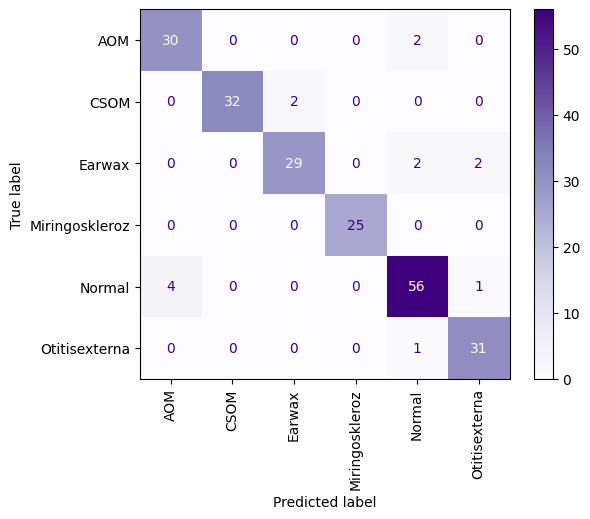

In [42]:
#plt.figure(figsize=(16,16))
disp = ConfusionMatrixDisplay(confusion_matrix= cm, display_labels=target_names)
disp = disp.plot(cmap=plt.cm.Purples, values_format = 'g',xticks_rotation = 'vertical')
plt.savefig("cf_mobilenet_nontrainable.png")
plt.show()

In [44]:
df1 = pd.DataFrame(cm)
print(df1)

    0   1   2   3   4   5
0  30   0   0   0   2   0
1   0  32   2   0   0   0
2   0   0  29   0   2   2
3   0   0   0  25   0   0
4   4   0   0   0  56   1
5   0   0   0   0   1  31


In [45]:
report = classification_report(test_labels_encoded, y_pred_class1, target_names=target_names)
print(report)

                precision    recall  f1-score   support

           AOM       0.88      0.94      0.91        32
          CSOM       1.00      0.94      0.97        34
        Earwax       0.94      0.88      0.91        33
Miringoskleroz       1.00      1.00      1.00        25
        Normal       0.92      0.92      0.92        61
 Otitisexterna       0.91      0.97      0.94        32

      accuracy                           0.94       217
     macro avg       0.94      0.94      0.94       217
  weighted avg       0.94      0.94      0.94       217



In [46]:
#from tensorflow.keras.utils import to_categorical
y_true = test_labels_encoded

In [47]:
print("specificity: "+ str(specificity_score(y_true, y_pred_class1, average=None)))
print("sensitivity: "+ str(sensitivity_score(y_true, y_pred_class1, average=None)))
print("Precision: "+ str(precision_score(y_true, y_pred_class1, average=None)))
print("Recall: "+ str(recall_score(y_true, y_pred_class1, average=None)))
print("f1_score: "+ str(f1_score(y_true, y_pred_class1, average=None)))
print("weighted Roc score: " + str(roc_auc_score(y_true,Y_pred1,multi_class='ovr',average=None)))

specificity: [0.97837838 1.         0.98913043 1.         0.96794872 0.98378378]
sensitivity: [0.9375     0.94117647 0.87878788 1.         0.91803279 0.96875   ]
Precision: [0.88235294 1.         0.93548387 1.         0.91803279 0.91176471]
Recall: [0.9375     0.94117647 0.87878788 1.         0.91803279 0.96875   ]
f1_score: [0.90909091 0.96969697 0.90625    1.         0.91803279 0.93939394]
weighted Roc score: [0.98108108 0.99967856 0.993083   1.         0.98139975 0.99898649]


In [48]:
specificity_non = specificity_score(y_true, y_pred_class1, average='weighted')
sensitivity_non = sensitivity_score(y_true, y_pred_class1, average='weighted')
Precision_non = precision_score(y_true, y_pred_class1, average='weighted')
Recall_non = recall_score(y_true, y_pred_class1, average='weighted')
f1_score_non = f1_score(y_true, y_pred_class1, average='weighted')
Roc_score_non = roc_auc_score(y_true,Y_pred1,multi_class='ovr',average='weighted')
accuracy_non = accuracy_score(y_true, y_pred_class1)

In [49]:
print("specificity: "+ str(specificity_non))
print("sensitivity: "+ str(sensitivity_non))
print("Precision: "+ str(Precision_non))
print("Recall: "+ str(Recall_non))
print("f1_score: "+ str(f1_score_non))
print("weighted Roc score: " + str(Roc_score_non))
print("accuracy : " + str(accuracy_non))

specificity: 0.9837574439257469
sensitivity: 0.9354838709677419
Precision: 0.9367867854738149
Recall: 0.9354838709677419
f1_score: 0.9356104245217148
weighted Roc score: 0.9907297555125942
accuracy : 0.9354838709677419


## trainable

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint
# Checkpoint to save best model per epoch
model_file_path = "saved_models/model1_mobilenet-{epoch:02d}-{val_accuracy:.4f}.h5"
checkpoint1 = ModelCheckpoint(
    filepath=model_file_path,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True,
    verbose=1)

In [57]:
input_shape = (224,224,3)
model = tf.keras.applications.MobileNet(input_shape = input_shape,
    include_top=False,
    weights="imagenet",
    input_tensor=None,
    pooling=None,
    classifier_activation="softmax",
)

#model.trainable = False

global_average_pooling = GlobalAveragePooling2D()(model.output)
fc1 = Dense(units = 55, activation = 'relu', name = 'Dense1_tuned')(global_average_pooling)
dropout1 = Dropout(rate = 0.1, 
                      # seed = 123, 
                   name = 'dropout_tuned')(fc1)
fc2 = Dense(units = 50, activation = 'relu' , name = 'Dense2_tuned')(dropout1)
    
output_layer = Dense(6, activation = 'softmax', name = 'output_layer')(fc2)
model = Model(model.input, output_layer)

lr_schedule = keras.optimizers.schedules.ExponentialDecay(
            initial_learning_rate = 0.0007,
            decay_steps=300,
            decay_rate=0.9)

model.compile(optimizer= Adam(learning_rate=lr_schedule), loss='categorical_crossentropy',metrics=['accuracy'])

In [58]:
#model.summary()

In [59]:
hist = model.fit(train_images, y_train, epochs=10, validation_data = (test_images,y_test) 
                 #,callbacks=[checkpoint1]
          , verbose=1,batch_size = 16)

Epoch 1/10
55/55 [==============================] - 16s 80ms/step - loss: 0.7984 - accuracy: 0.7210 - val_loss: 2.5199 - val_accuracy: 0.4562
Epoch 2/10
55/55 [==============================] - 3s 63ms/step - loss: 0.2480 - accuracy: 0.9231 - val_loss: 1.6596 - val_accuracy: 0.6359
Epoch 3/10
55/55 [==============================] - 3s 63ms/step - loss: 0.2154 - accuracy: 0.9265 - val_loss: 0.8745 - val_accuracy: 0.7834
Epoch 4/10
55/55 [==============================] - 4s 64ms/step - loss: 0.1293 - accuracy: 0.9575 - val_loss: 0.1275 - val_accuracy: 0.9447
Epoch 5/10
55/55 [==============================] - 4s 64ms/step - loss: 0.0899 - accuracy: 0.9759 - val_loss: 0.1855 - val_accuracy: 0.9493
Epoch 6/10
55/55 [==============================] - 4s 65ms/step - loss: 0.0856 - accuracy: 0.9770 - val_loss: 0.1376 - val_accuracy: 0.9447
Epoch 7/10
55/55 [==============================] - 4s 65ms/step - loss: 0.0442 - accuracy: 0.9885 - val_loss: 0.0049 - val_accuracy: 1.0000
Epoch 8/10
5

In [63]:
model.save('saved_models/model1_mobilenet.h5')

/opt/conda/lib/python3.10/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [60]:
Y_pred = model.predict(test_images)
y_pred_class = np.argmax(Y_pred ,  axis = 1)

7/7 [==============================] - 1s 33ms/step


In [61]:
loss, acc = model.evaluate(test_images,y_test)

7/7 [==============================] - 0s 35ms/step - loss: 0.1263 - accuracy: 0.9585


In [62]:
accuracy2 = accuracy_score(test_labels_encoded, y_pred_class)
accuracy2

0.9585253456221198

In [65]:
from keras.models import load_model
model1_loaded = load_model(r'/kaggle/working/saved_models/model1_mobilenet.h5')

In [66]:
Y_pred_loaded = model1_loaded.predict(test_images)
y_pred_class_loaded = np.argmax(Y_pred_loaded ,  axis = 1)

7/7 [==============================] - 1s 41ms/step


In [67]:
loss, acc = model1_loaded.evaluate(test_images,y_test)

7/7 [==============================] - 1s 35ms/step - loss: 0.1263 - accuracy: 0.9585


In [68]:
accuracy_loaded = accuracy_score(test_labels_encoded, y_pred_class_loaded)
accuracy_loaded

0.9585253456221198

In [69]:
# Confusion Matrix  & Pres  & Recall   & F1-Score

target_names = ['AOM', 'CSOM', 'Earwax','Miringoskleroz','Normal','Otitisexterna']
label_names = [0,1,2,3,4,5]

cm = confusion_matrix(test_labels_encoded, y_pred_class_loaded, labels = label_names)

print('Confusion Matrix')
print(confusion_matrix(test_labels_encoded, y_pred_class_loaded))

print('classification_Report')
print(classification_report(test_labels_encoded, y_pred_class_loaded, target_names=target_names))

Confusion Matrix
[[31  0  0  0  1  0]
 [ 0 27  7  0  0  0]
 [ 0  0 33  0  0  0]
 [ 0  0  0 25  0  0]
 [ 0  0  0  0 61  0]
 [ 0  0  0  0  1 31]]
classification_Report
                precision    recall  f1-score   support

           AOM       1.00      0.97      0.98        32
          CSOM       1.00      0.79      0.89        34
        Earwax       0.82      1.00      0.90        33
Miringoskleroz       1.00      1.00      1.00        25
        Normal       0.97      1.00      0.98        61
 Otitisexterna       1.00      0.97      0.98        32

      accuracy                           0.96       217
     macro avg       0.97      0.96      0.96       217
  weighted avg       0.96      0.96      0.96       217



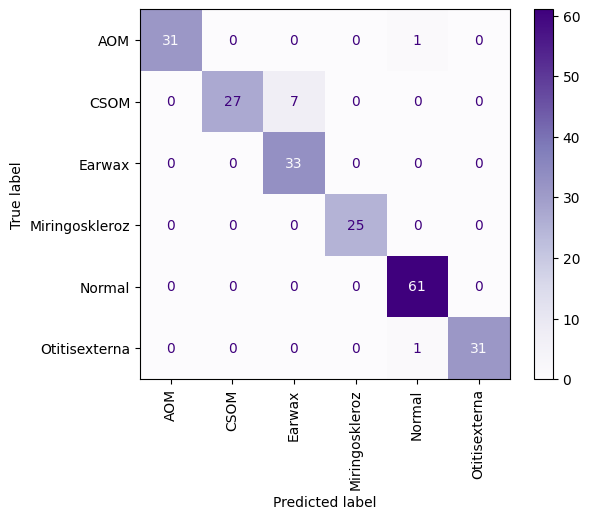

In [75]:
disp = ConfusionMatrixDisplay(confusion_matrix= cm, display_labels=target_names)
disp = disp.plot(cmap=plt.cm.Purples, values_format = 'g',xticks_rotation = 'vertical')
plt.savefig("cf_mobilenet_trainable.png")
plt.show()

In [76]:
df1 = pd.DataFrame(cm)
print(df1)

    0   1   2   3   4   5
0  31   0   0   0   1   0
1   0  27   7   0   0   0
2   0   0  33   0   0   0
3   0   0   0  25   0   0
4   0   0   0   0  61   0
5   0   0   0   0   1  31


In [77]:
class_labels = target_names
class_labels

['AOM', 'CSOM', 'Earwax', 'Miringoskleroz', 'Normal', 'Otitisexterna']

In [78]:
report = classification_report(test_labels_encoded, y_pred_class_loaded, target_names=class_labels)
print(report)

                precision    recall  f1-score   support

           AOM       1.00      0.97      0.98        32
          CSOM       1.00      0.79      0.89        34
        Earwax       0.82      1.00      0.90        33
Miringoskleroz       1.00      1.00      1.00        25
        Normal       0.97      1.00      0.98        61
 Otitisexterna       1.00      0.97      0.98        32

      accuracy                           0.96       217
     macro avg       0.97      0.96      0.96       217
  weighted avg       0.96      0.96      0.96       217



In [79]:
report_dic = classification_report(test_labels_encoded, y_pred_class_loaded, target_names=class_labels, output_dict=True)
print(report_dic)

{'AOM': {'precision': 1.0, 'recall': 0.96875, 'f1-score': 0.9841269841269841, 'support': 32}, 'CSOM': {'precision': 1.0, 'recall': 0.7941176470588235, 'f1-score': 0.8852459016393442, 'support': 34}, 'Earwax': {'precision': 0.825, 'recall': 1.0, 'f1-score': 0.9041095890410958, 'support': 33}, 'Miringoskleroz': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 25}, 'Normal': {'precision': 0.9682539682539683, 'recall': 1.0, 'f1-score': 0.9838709677419354, 'support': 61}, 'Otitisexterna': {'precision': 1.0, 'recall': 0.96875, 'f1-score': 0.9841269841269841, 'support': 32}, 'accuracy': 0.9585253456221198, 'macro avg': {'precision': 0.9655423280423281, 'recall': 0.9552696078431372, 'f1-score': 0.9569134044460572, 'support': 217}, 'weighted avg': {'precision': 0.9644630970667838, 'recall': 0.9585253456221198, 'f1-score': 0.9582222723985203, 'support': 217}}


In [80]:
#from tensorflow.keras.utils import to_categorical
y_true = test_labels_encoded
#y_test = to_categorical(y_true)

In [81]:
specificity_classes = specificity_score(y_true, y_pred_class_loaded, average=None)
sensitivity_classes = sensitivity_score(y_true, y_pred_class_loaded, average=None)
Precision_classes = precision_score(y_true, y_pred_class_loaded, average=None)
Recall_classes = recall_score(y_true, y_pred_class_loaded, average=None)
f1_score_classes = f1_score(y_true, y_pred_class_loaded, average=None)
Roc_score_classes = roc_auc_score(y_true,Y_pred_loaded,multi_class='ovr',average=None)

In [82]:
print("specificity: "+ str(specificity_classes))
print("sensitivity: "+ str(sensitivity_classes))
print("Precision: "+ str(Precision_classes))
print("Recall: "+ str(Recall_classes))
print("Roc score: " + str(Roc_score_classes))
print("f1_score: "+ str(f1_score_classes))

specificity: [1.         1.         0.96195652 1.         0.98717949 1.        ]
sensitivity: [0.96875    0.79411765 1.         1.         1.         0.96875   ]
Precision: [1.         1.         0.825      1.         0.96825397 1.        ]
Recall: [0.96875    0.79411765 1.         1.         1.         0.96875   ]
Roc score: [0.99695946 1.         1.         1.         0.99852879 1.        ]
f1_score: [0.98412698 0.8852459  0.90410959 1.         0.98387097 0.98412698]


In [83]:
dict = {'specificity': specificity_classes, 'sensitivity': sensitivity_classes, 'Precision': Precision_classes, 'Recall': Recall_classes, 'f1_score': f1_score_classes, 'Roc score': Roc_score_classes} 
df_metrics = pd.DataFrame(dict)
df_metrics = df_metrics.set_axis(class_labels)
print(df_metrics)

                specificity  sensitivity  Precision    Recall  f1_score  \
AOM                1.000000     0.968750   1.000000  0.968750  0.984127   
CSOM               1.000000     0.794118   1.000000  0.794118  0.885246   
Earwax             0.961957     1.000000   0.825000  1.000000  0.904110   
Miringoskleroz     1.000000     1.000000   1.000000  1.000000  1.000000   
Normal             0.987179     1.000000   0.968254  1.000000  0.983871   
Otitisexterna      1.000000     0.968750   1.000000  0.968750  0.984127   

                Roc score  
AOM              0.996959  
CSOM             1.000000  
Earwax           1.000000  
Miringoskleroz   1.000000  
Normal           0.998529  
Otitisexterna    1.000000  


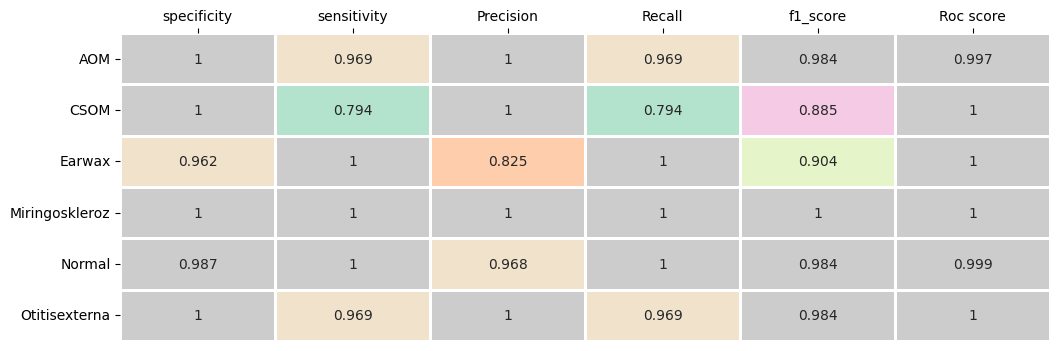

In [143]:
plt.figure(figsize=(12,4))
ax=sns.heatmap(df_metrics,cbar=False, annot=True, fmt=".3g", cmap= 'Pastel2', linewidths = 1 )
plt.savefig("metrics_mobilenet_trainable.png")
ax.xaxis.tick_top()

In [144]:
df_metrics.to_excel('metrics_mobilenet_trainable.xlsx', index = True)
df_metrics

,specificity,sensitivity,Precision,Recall,f1_score,Roc score
AOM,1.000000,0.968750,1.000000,0.968750,0.984127,0.996959
CSOM,1.000000,0.794118,1.000000,0.794118,0.885246,1.000000
Earwax,0.961957,1.000000,0.825000,1.000000,0.904110,1.000000
Miringoskleroz,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
Normal,0.987179,1.000000,0.968254,1.000000,0.983871,0.998529
Otitisexterna,1.000000,0.968750,1.000000,0.968750,0.984127,1.000000


In [86]:
specificity = specificity_score(y_true, y_pred_class_loaded, average='weighted')
sensitivity = sensitivity_score(y_true, y_pred_class_loaded, average='weighted')
Precision = precision_score(y_true, y_pred_class_loaded, average='weighted')
Recall = recall_score(y_true, y_pred_class_loaded, average='weighted')
Roc_score = roc_auc_score(y_true,Y_pred_loaded,multi_class='ovr',average='weighted')
accuracy = accuracy_score(y_true, y_pred_class_loaded)
f1_score = f1_score(y_true, y_pred_class_loaded, average='weighted')

In [87]:
print("weighted specificity: "+ str(specificity))
print("weighted sensitivity: "+ str(sensitivity))
print("weighted Precision: "+ str(Precision))
print("weighted Recall: "+ str(Recall))
print("weighted Roc score: " + str(Roc_score))
print("Accuracy: " + str(accuracy))
print("weighted f1_score: "+ str(f1_score))

weighted specificity: 0.9906106632964979
weighted sensitivity: 0.9585253456221198
weighted Precision: 0.9644630970667838
weighted Recall: 0.9585253456221198
weighted Roc score: 0.9991380604283829
Accuracy: 0.9585253456221198
weighted f1_score: 0.9582222723985203


In [94]:
print("Macro specificity: "+ str(specificity_score(y_true, y_pred_class_loaded, average='macro')))
print("Macro sensitivity: "+ str(sensitivity_score(y_true, y_pred_class_loaded, average='macro')))
print("Macro Precision: "+ str(precision_score(y_true, y_pred_class_loaded, average='macro')))
print("Macro Recall: "+ str(recall_score(y_true, y_pred_class_loaded, average='macro')))
print("Macro Roc score: " + str(roc_auc_score(y_true,Y_pred_loaded,multi_class='ovr',average='macro')))
#print("Macro f1_score: "+ str(f1_score(y_true, y_pred_class_loaded, average='macro')))

Macro specificity: 0.991522668153103
Macro sensitivity: 0.9552696078431372
Macro Precision: 0.9655423280423281
Macro Recall: 0.9552696078431372
Macro Roc score: 0.9992480421783699


In [95]:
print("Micro specificity: "+ str(specificity_score(y_true, y_pred_class_loaded, average='micro')))
print("Micro sensitivity: "+ str(sensitivity_score(y_true, y_pred_class_loaded, average='micro')))
print("Micro Precision: "+ str(precision_score(y_true, y_pred_class_loaded, average='micro')))
print("Micro Recall: "+ str(recall_score(y_true, y_pred_class_loaded, average='micro')))
print("Micro Roc score: " + str(roc_auc_score(y_true,Y_pred_loaded,multi_class='ovr',average='micro')))
#print("Micro f1_score: "+ str(f1_score(y_true, y_pred_class_loaded, average='micro')))

Micro specificity: 0.9917050691244239
Micro sensitivity: 0.9585253456221198
Micro Precision: 0.9585253456221198
Micro Recall: 0.9585253456221198
Micro Roc score: 0.9984539913780288


In [96]:
fpr = {}
tpr = {}
roc_auc = {}
for i in range(6):
    r = roc_auc_score(y_test[:, i], Y_pred_loaded[:, i])
    print("The ROC AUC score of "+target_names[i]+" is: "+str(r))

The ROC AUC score of AOM is: 0.9969594594594595
The ROC AUC score of CSOM is: 1.0
The ROC AUC score of Earwax is: 1.0
The ROC AUC score of Miringoskleroz is: 1.0
The ROC AUC score of Normal is: 0.9985287936107609
The ROC AUC score of Otitisexterna is: 1.0


In [97]:
# Compute ROC curve and ROC area for each class
fpr = {}
tpr = {}
roc_auc = {}
for i in range(6):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], Y_pred_loaded[:, i], drop_intermediate=False)
    roc_auc[i] = auc(fpr[i], tpr[i])

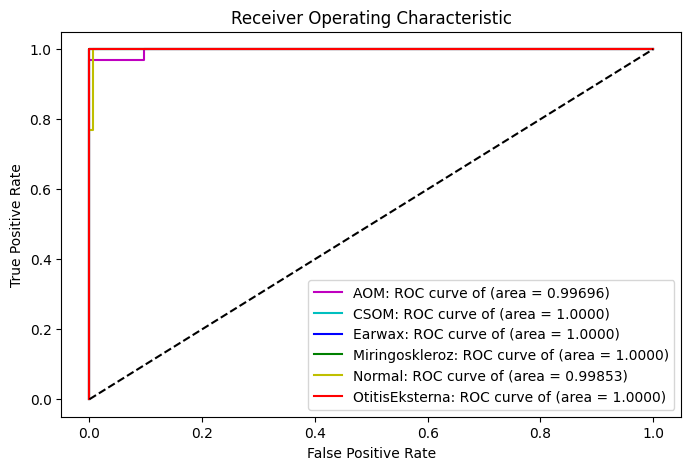

In [124]:
plt.figure(figsize=(8,5))

plt.plot(fpr[0], tpr[0],'m',label='AOM: ROC curve of (area = %0.5f)' % roc_auc[0])
plt.plot(fpr[1], tpr[1],'c',label='CSOM: ROC curve of (area = %0.4f)' % roc_auc[1])
plt.plot(fpr[2], tpr[2],'b',label='Earwax: ROC curve of (area = %0.4f)' % roc_auc[2])
plt.plot(fpr[3], tpr[3],'g',label='Miringoskleroz: ROC curve of (area = %0.4f)' % roc_auc[3])
plt.plot(fpr[4], tpr[4],'y',label='Normal: ROC curve of (area = %0.5f)' % roc_auc[4])
plt.plot(fpr[5], tpr[5],'r',label='OtitisEksterna: ROC curve of (area = %0.4f)' % roc_auc[5])

plt.plot([0, 1], [0, 1], 'k--')
#plt.xlim([-0.1, 1.1])
#plt.ylim([-0.1, 1.1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.savefig("ROC_mobilenet_classes.png")
plt.show()

In [125]:
# Compute ROC curve and ROC area for each class
precision = {}
recall = {}
precision_recall = {}
for i in range(6):
    precision[i], recall[i], _ = precision_recall_curve(y_test[:, i], Y_pred_loaded[:, i])
    precision_recall[i] = auc(recall[i], precision[i])

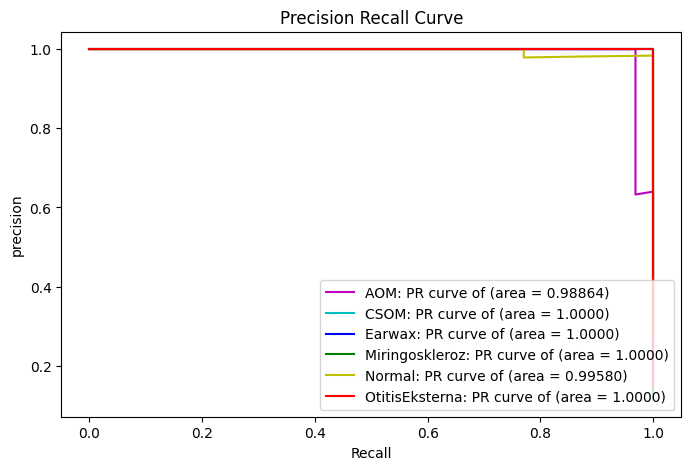

In [132]:
plt.figure(figsize=(8,5))

plt.plot(recall[0], precision[0],'m',label='AOM: PR curve of (area = %0.5f)' % precision_recall[0])
plt.plot(recall[1], precision[1],'c',label='CSOM: PR curve of (area = %0.4f)' % precision_recall[1])
plt.plot(recall[2], precision[2],'b',label='Earwax: PR curve of (area = %0.4f)' % precision_recall[2])
plt.plot(recall[3], precision[3],'g',label='Miringoskleroz: PR curve of (area = %0.4f)' % precision_recall[3])
plt.plot(recall[4], precision[4],'y',label='Normal: PR curve of (area = %0.5f)' % precision_recall[4])
plt.plot(recall[5], precision[5],'r',label='OtitisEksterna: PR curve of (area = %0.4f)' % precision_recall[5])

#plt.plot([1, 0], [0, 1], 'k--')
#plt.xlim([-0.1, 1.1])
#plt.ylim([-0.1, 1.1])
plt.xlabel('Recall')
plt.ylabel('precision')
plt.title('Precision Recall Curve')
plt.legend(loc="lower right")
plt.savefig("PR_mobilenet_classes.png")
plt.show()

In [101]:
Classification_report = pd.DataFrame.from_dict(report_dic)

In [102]:
Classification_report

,AOM,CSOM,Earwax,Miringoskleroz,Normal,Otitisexterna,accuracy,macro avg,weighted avg
precision,1.000000,1.000000,0.82500,1.0,0.968254,1.000000,0.958525,0.965542,0.964463
recall,0.968750,0.794118,1.00000,1.0,1.000000,0.968750,0.958525,0.955270,0.958525
f1-score,0.984127,0.885246,0.90411,1.0,0.983871,0.984127,0.958525,0.956913,0.958222
support,32.000000,34.000000,33.00000,25.0,61.000000,32.000000,0.958525,217.000000,217.000000


In [134]:
Classification_report.to_excel('classification_report_mobilenet_trainable.xlsx', index = True)

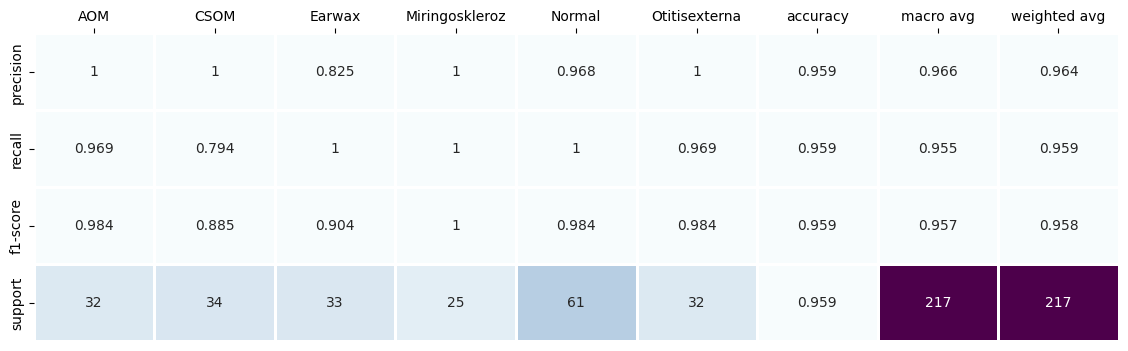

In [141]:
df = pd.read_excel('classification_report_mobilenet_trainable.xlsx',index_col=[0])
plt.figure(figsize=(14,4))
ax = sns.heatmap(df,cbar=False, annot=True, fmt=".3g", cmap= 'BuPu', linewidths = 1 )
ax.xaxis.tick_top()
plt.savefig("cr_mobilenet_trainable.png")

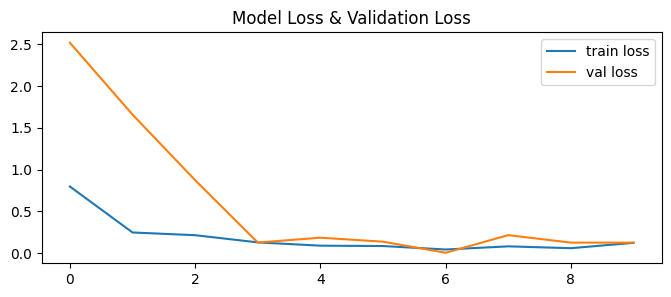

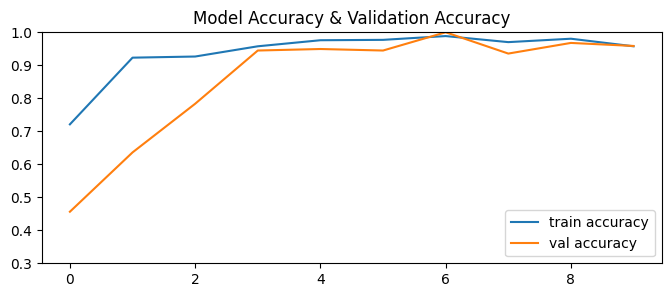

In [163]:
# plotting loss and accuracy
plt.figure(figsize=(8,3))
plt.plot(hist.history['loss'], label = 'train loss')
plt.plot(hist.history['val_loss'], label = 'val loss')
plt.title('Model Loss & Validation Loss')
plt.legend(loc="upper right")
plt.savefig("loss_mobilenet_trainable.png")
plt.show()

plt.figure(figsize=(8,3))
plt.plot(hist.history['accuracy'], label = 'train accuracy')
plt.plot(hist.history['val_accuracy'], label = 'val accuracy')
plt.ylim([0.3, 1])
plt.title('Model Accuracy & Validation Accuracy')
plt.legend(loc="lower right")
plt.savefig("accuracy_mobilenet_trainable.png")
plt.show()

In [164]:
tpr={}
fpr={}
roc_auc1={}
fpr["weighted"], tpr["weighted"], _ = roc_curve(y_test.ravel(), Y_pred_loaded.ravel())
roc_auc1["weighted"] = auc(fpr["weighted"], tpr["weighted"])
print("weighted Roc score: " + str(roc_auc1["weighted"]))

weighted Roc score: 0.9984539913780288


In [165]:
'''
tpr2={}
fpr2={}
roc_auc2={}
fpr2["weighted"], tpr2["weighted"], _ = roc_curve(y_test.ravel(), Y_pred_loaded.ravel())
roc_auc2["weighted"] = auc(fpr2["weighted"], tpr2["weighted"])
print("weighted Roc score: " + str(roc_auc2["weighted"]))
'''

'\ntpr2={}\nfpr2={}\nroc_auc2={}\nfpr2["weighted"], tpr2["weighted"], _ = roc_curve(y_test.ravel(), Y_pred_loaded.ravel())\nroc_auc2["weighted"] = auc(fpr2["weighted"], tpr2["weighted"])\nprint("weighted Roc score: " + str(roc_auc2["weighted"]))\n'

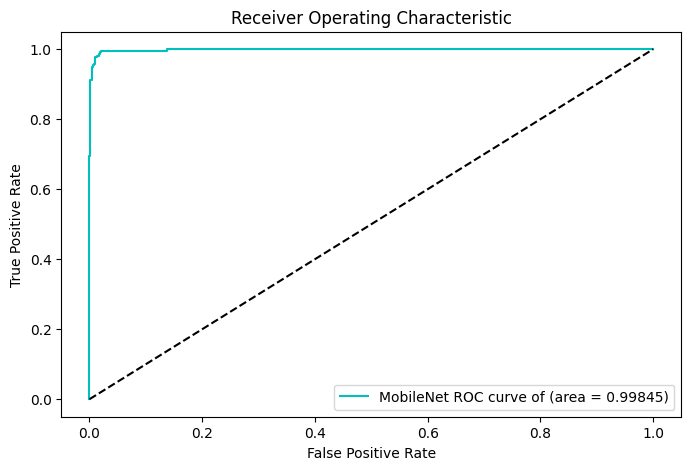

In [170]:
plt.figure(figsize=(8,5))

plt.plot(fpr['weighted'], tpr['weighted'],'c',label='MobileNet ROC curve of (area = %0.5f)' % roc_auc1['weighted'])
#plt.plot(fpr2['weighted'], tpr2['weighted'],'b',label='DenseNet169 ROC curve of (area = %0.5f)' % roc_auc2['weighted'])

plt.plot([0, 1], [0, 1], 'k--')
#plt.xlim([-0.1, 1.1])
#plt.ylim([-0.1, 1.1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.savefig("ROC_mobilenet.png")
plt.show()

In [171]:
precision1={}
recall1={}
precision_recall1={}
precision1["weighted"], recall1["weighted"], _ = precision_recall_curve(y_test.ravel(), Y_pred_loaded.ravel())
precision_recall1["weighted"] = auc(recall1["weighted"], precision1["weighted"])
print("PR score: " + str(precision_recall1["weighted"]))

PR score: 0.9933930738367742


In [168]:
'''
precision2={}
recall2={}
precision_recall2={}
precision2["weighted"], recall2["weighted"], _ = precision_recall_curve(y_test.ravel(), Y_pred_loaded.ravel())
precision_recall2["weighted"] = auc(recall2["weighted"], precision2["weighted"])
print("PR score: " + str(precision_recall2["weighted"]))
'''

'\nprecision2={}\nrecall2={}\nprecision_recall2={}\nprecision2["weighted"], recall2["weighted"], _ = precision_recall_curve(y_test.ravel(), Y_pred_loaded.ravel())\nprecision_recall2["weighted"] = auc(recall2["weighted"], precision2["weighted"])\nprint("PR score: " + str(precision_recall2["weighted"]))\n'

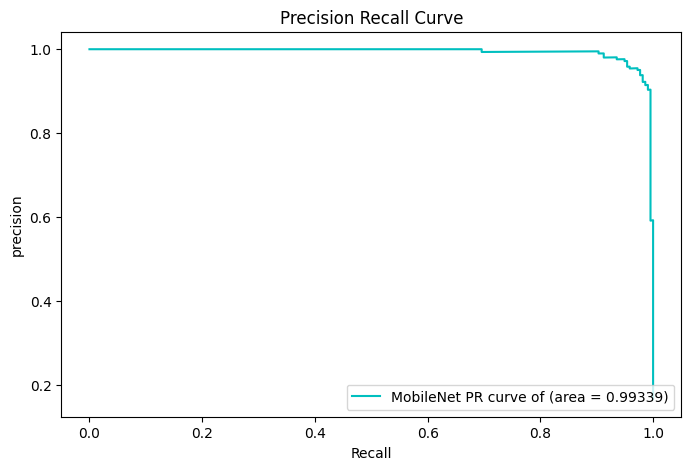

In [172]:
plt.figure(figsize=(8,5))

plt.plot(recall1['weighted'], precision1['weighted'],'c',label='MobileNet PR curve of (area = %0.5f)' % precision_recall1['weighted'])
#plt.plot(recall2['weighted'], precision2['weighted'],'b',label='DenseNet169 PR curve of (area = %0.5f)' % precision_recall2['weighted'])

#plt.plot([1, 0], [0, 1], 'k--')
#plt.xlim([-0.1, 1.1])
#plt.ylim([-0.1, 1.1])
plt.xlabel('Recall')
plt.ylabel('precision')
plt.title('Precision Recall Curve')
plt.legend(loc="lower right")
plt.savefig("PR_mobilenet.png")
plt.show()

In [173]:
accuracies = []
accuracies.append(accuracy)
specificitys = [] 
specificitys.append(specificity)
sensitivitys = [] 
sensitivitys.append(sensitivity)
Precisions = [] 
Precisions.append(Precision)
Recalls = [] 
Recalls.append(Recall)
f1_scores = []
f1_scores.append(f1_scores)
Roc_scores = [] 
Roc_scores.append(Roc_score)

In [174]:
df_total = df1

## 5 trails

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint
# Checkpoint to save best model per epoch
model_file_path2 = "saved_models/model1_mobilenet_trials-{epoch:02d}-{val_accuracy:.4f}.h5"
checkpoint2 = ModelCheckpoint(
    filepath=model_file_path2,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True,
    verbose=1)

In [210]:
input_shape = (224,224,3)
model = tf.keras.applications.MobileNet(input_shape = input_shape,
    include_top=False,
    weights="imagenet",
    input_tensor=None,
    pooling=None,
    classifier_activation="softmax",
)

#model.trainable = False

global_average_pooling = GlobalAveragePooling2D()(model.output)
fc1 = Dense(units = 55, activation = 'relu', name = 'Dense1_tuned')(global_average_pooling)
dropout1 = Dropout(rate = 0.1, 
                      # seed = 123, 
                   name = 'dropout_tuned')(fc1)
fc2 = Dense(units = 50, activation = 'relu' , name = 'Dense2_tuned')(dropout1)
    
output_layer = Dense(6, activation = 'softmax', name = 'output_layer')(fc2)
model_trails = Model(model.input, output_layer)

lr_schedule = keras.optimizers.schedules.ExponentialDecay(
            initial_learning_rate = 0.0007,
            decay_steps=300,
            decay_rate=0.9)

model_trails.compile(optimizer= Adam(learning_rate=lr_schedule), loss='categorical_crossentropy',metrics=['accuracy'])

In [211]:
hist_trails = model_trails.fit(train_images, y_train, epochs=10, validation_data = (test_images,y_test), callbacks=[checkpoint2]
          , verbose=1,batch_size = 16)

Epoch 1/10
55/55 [==============================] - 15s 79ms/step - loss: 0.8491 - accuracy: 0.7049 - val_loss: 2.7177 - val_accuracy: 0.3594
Epoch 2/10
55/55 [==============================] - 3s 63ms/step - loss: 0.2825 - accuracy: 0.9013 - val_loss: 3.6902 - val_accuracy: 0.2627
Epoch 3/10
55/55 [==============================] - 4s 64ms/step - loss: 0.1556 - accuracy: 0.9495 - val_loss: 2.2727 - val_accuracy: 0.6083
Epoch 4/10
55/55 [==============================] - 4s 65ms/step - loss: 0.1123 - accuracy: 0.9552 - val_loss: 0.6662 - val_accuracy: 0.8387
Epoch 5/10
55/55 [==============================] - 4s 65ms/step - loss: 0.1083 - accuracy: 0.9679 - val_loss: 0.5842 - val_accuracy: 0.8295
Epoch 6/10
55/55 [==============================] - 4s 65ms/step - loss: 0.1048 - accuracy: 0.9656 - val_loss: 0.2020 - val_accuracy: 0.9401
Epoch 7/10
55/55 [==============================] - 4s 65ms/step - loss: 0.1816 - accuracy: 0.9541 - val_loss: 0.1935 - val_accuracy: 0.9401
Epoch 8/10
5

In [ ]:
model_trails = load_model(r'/kaggle/working/saved_models/model1_mobilenet.h5')

In [212]:
Y_pred_trails = model_trails.predict(test_images)
y_pred_class_trails = np.argmax(Y_pred_trails ,  axis = 1)

7/7 [==============================] - 1s 40ms/step


In [213]:
loss, acc = model_trails.evaluate(test_images,y_test)

7/7 [==============================] - 0s 35ms/step - loss: 0.0036 - accuracy: 1.0000


In [214]:
accuracy_trails = accuracy_score(test_labels_encoded, y_pred_class_trails)
accuracy_trails

1.0

In [215]:
# Confusion Matrix  & Pres  & Recall   & F1-Score

target_names = ['AOM', 'CSOM', 'Earwax','Miringoskleroz','Normal','Otitisexterna']
label_names = [0,1,2,3,4,5]

cm_trails = confusion_matrix(test_labels_encoded, y_pred_class_trails, labels = label_names)

print('Confusion Matrix')
print(confusion_matrix(test_labels_encoded, y_pred_class_trails))

print('classification_Report')
print(classification_report(test_labels_encoded, y_pred_class_trails, target_names=target_names))

Confusion Matrix
[[32  0  0  0  0  0]
 [ 0 34  0  0  0  0]
 [ 0  0 33  0  0  0]
 [ 0  0  0 25  0  0]
 [ 0  0  0  0 61  0]
 [ 0  0  0  0  0 32]]
classification_Report
                precision    recall  f1-score   support

           AOM       1.00      1.00      1.00        32
          CSOM       1.00      1.00      1.00        34
        Earwax       1.00      1.00      1.00        33
Miringoskleroz       1.00      1.00      1.00        25
        Normal       1.00      1.00      1.00        61
 Otitisexterna       1.00      1.00      1.00        32

      accuracy                           1.00       217
     macro avg       1.00      1.00      1.00       217
  weighted avg       1.00      1.00      1.00       217



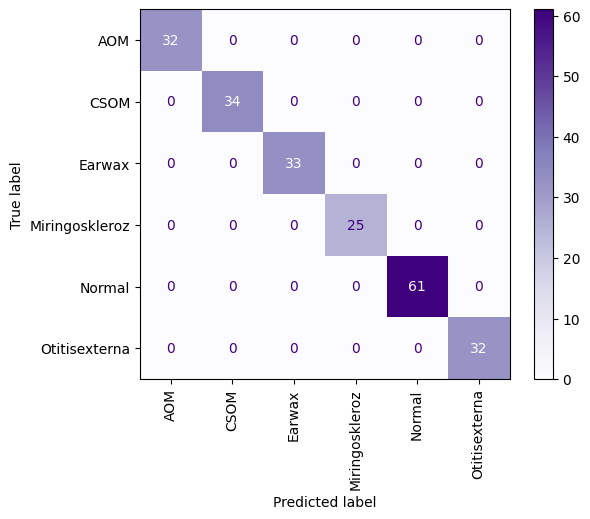

In [216]:
disp = ConfusionMatrixDisplay(confusion_matrix= cm_trails, display_labels=target_names)
disp = disp.plot(cmap=plt.cm.Purples, values_format = 'g',xticks_rotation = 'vertical')
#plt.savefig("cf_mobilenet_trials.png")
plt.show()

In [217]:

df2 = pd.DataFrame(cm_trails)
#print(df2)
df_total = df_total + df2
print(df_total)
'''
df3 = pd.DataFrame(cm_trails)
print(df3)
df_total = df_total + df3
print(df_total)
'''
'''
df4 = pd.DataFrame(cm_trails)
print(df4)
df_total = df_total + df4
print(df_total)
'''
'''
df5 = pd.DataFrame(cm_trails)
print(df5)
df_total = df_total + df5
print(df_total)
'''

     0    1    2    3    4    5
0  150    0    3    0    5    2
1    0  160    7    0    1    2
2    1   20  141    0    1    2
3    0    0    0  125    0    0
4    6    0    9    0  290    0
5    0    0    1    0    1  158


'\ndf5 = pd.DataFrame(cm_trails)\nprint(df5)\ndf_total = df_total + df5\nprint(df_total)\n'

In [218]:
specificity_trails = specificity_score(y_true, y_pred_class_trails, average='weighted')
sensitivity_trails = sensitivity_score(y_true, y_pred_class_trails, average='weighted')
Precision_trails = precision_score(y_true, y_pred_class_trails, average='weighted')
Recall_trails = recall_score(y_true, y_pred_class_trails, average='weighted')
Roc_score_trails = roc_auc_score(y_true,Y_pred_trails,multi_class='ovr',average='weighted')
#f1_score_trails = f1_score(y_true, y_pred_class_trails, average='weighted')

In [219]:
accuracies.append(accuracy_trails)
specificitys.append(specificity_trails)
sensitivitys.append(sensitivity_trails)
Precisions.append(Precision_trails)
Recalls.append(Recall_trails)
Roc_scores.append(Roc_score_trails)
#f1_scores.append(f1_score_trails)

In [220]:
print("Accuracy: " ,accuracies)
print("weighted specificity: ",specificitys)
print("weighted sensitivity: ",sensitivitys)
print("weighted Precision: ",Precisions)
print("weighted Recall: ",Recalls)
print("weighted Roc score: " ,Roc_scores)
#print("weighted f1_score: ",f1_scores)

Accuracy:  [0.9585253456221198, 0.9262672811059908, 0.8571428571428571, 0.9769585253456221, 1.0]
weighted specificity:  [0.9906106632964979, 0.9858888549631888, 0.9690838108870896, 0.9959850704240606, 1.0]
weighted sensitivity:  [0.9585253456221198, 0.9262672811059908, 0.8571428571428571, 0.9769585253456221, 1.0]
weighted Precision:  [0.9644630970667838, 0.9412296818368925, 0.8913114966830404, 0.9791421945122134, 1.0]
weighted Recall:  [0.9585253456221198, 0.9262672811059908, 0.8571428571428571, 0.9769585253456221, 1.0]
weighted Roc score:  [0.9991380604283829, 0.9959037285825505, 0.9969545835742696, 1.0, 1.0]


## final results

In [221]:
folds = ['fold1', 'fold2', 'fold3', 'fold4', 'fold5']

In [222]:
#'f1_score': f1_scores

In [223]:
dict = {'specificity': specificitys, 'sensitivity': sensitivitys, 'Precision': Precisions, 'Recall': Recalls,'Roc score': Roc_scores, 'accuracy': accuracies} 
df_metrics_fold = pd.DataFrame(dict)
df_metrics_fold

,specificity,sensitivity,Precision,Recall,Roc score,accuracy
0,0.990611,0.958525,0.964463,0.958525,0.999138,0.958525
1,0.985889,0.926267,0.941230,0.926267,0.995904,0.926267
2,0.969084,0.857143,0.891311,0.857143,0.996955,0.857143
3,0.995985,0.976959,0.979142,0.976959,1.000000,0.976959
4,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [224]:
df_metrics_fold = df_metrics_fold.set_axis(folds)
print(df_metrics_fold)

       specificity  sensitivity  Precision    Recall  Roc score  accuracy
fold1     0.990611     0.958525   0.964463  0.958525   0.999138  0.958525
fold2     0.985889     0.926267   0.941230  0.926267   0.995904  0.926267
fold3     0.969084     0.857143   0.891311  0.857143   0.996955  0.857143
fold4     0.995985     0.976959   0.979142  0.976959   1.000000  0.976959
fold5     1.000000     1.000000   1.000000  1.000000   1.000000  1.000000


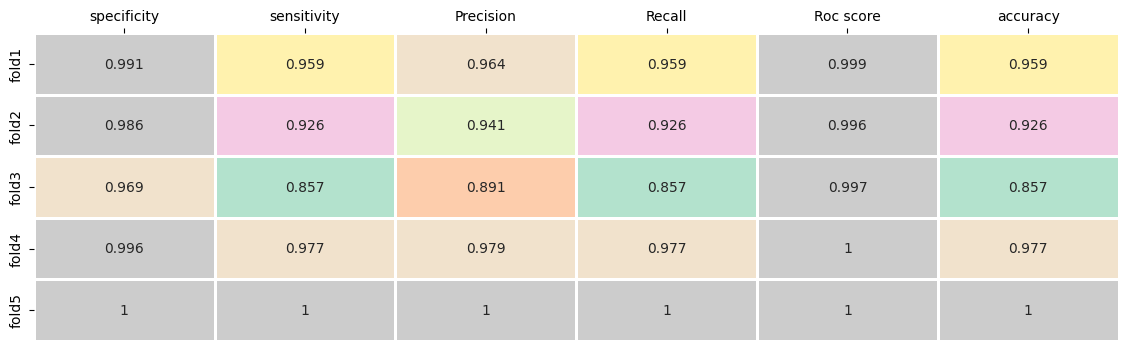

In [227]:
plt.figure(figsize=(14,4))
ax=sns.heatmap(df_metrics_fold,cbar=False, annot=True, fmt=".3g", cmap= 'Pastel2', linewidths = 1 )
plt.savefig("metrics_fold_mobilenet.png")
ax.xaxis.tick_top()

In [228]:
df_metrics_fold.to_excel('metrics_fold_mobilenet.xlsx', index = True)
df_metrics_fold

,specificity,sensitivity,Precision,Recall,Roc score,accuracy
fold1,0.990611,0.958525,0.964463,0.958525,0.999138,0.958525
fold2,0.985889,0.926267,0.941230,0.926267,0.995904,0.926267
fold3,0.969084,0.857143,0.891311,0.857143,0.996955,0.857143
fold4,0.995985,0.976959,0.979142,0.976959,1.000000,0.976959
fold5,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [229]:
cm_all = df_total.to_numpy()
cm_all

array([[150,   0,   3,   0,   5,   2],
       [  0, 160,   7,   0,   1,   2],
       [  1,  20, 141,   0,   1,   2],
       [  0,   0,   0, 125,   0,   0],
       [  6,   0,   9,   0, 290,   0],
       [  0,   0,   1,   0,   1, 158]])

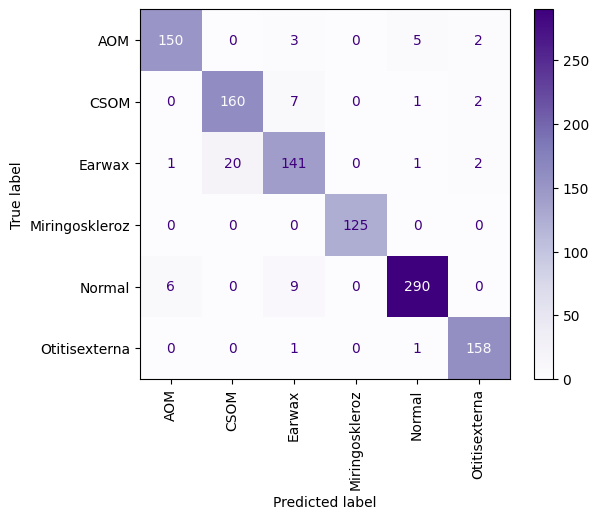

In [231]:
disp = ConfusionMatrixDisplay(confusion_matrix= cm_all, display_labels=target_names)
disp = disp.plot(cmap=plt.cm.Purples, values_format = 'g',xticks_rotation = 'vertical')
plt.savefig("cf_mobilenet_total.png")
plt.show()

In [232]:
accuracies = np.array(accuracies)

In [233]:
for score in accuracies:
    print("Score for this fold is: ", score)

# report performance
print('Mean Accuracy: ', (np.mean(accuracies)))
print('STD: ', (np.std(accuracies)))


Score for this fold is:  0.9585253456221198
Score for this fold is:  0.9262672811059908
Score for this fold is:  0.8571428571428571
Score for this fold is:  0.9769585253456221
Score for this fold is:  1.0
Mean Accuracy:  0.943778801843318
STD:  0.049581484447236014
